In [16]:
!pip install numpy
!pip install matplotlib
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt
import numpy as np


[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: pip install --upgrade pip


In [17]:
# make the mean and covariance the same as the mml book
mean = np.array([0, 2])
cov = np.array([[0.3, -1], [-1, 5]])
# generate the samples with the size of 200
samples = np.random.multivariate_normal(mean, cov, size=200) 
samples

array([[-6.25115742e-01,  3.63491515e+00],
       [ 1.53667374e-02,  4.02771210e+00],
       [ 3.81575761e-01,  3.04035147e+00],
       [-2.53323145e-02,  1.93332040e-01],
       [ 1.26512017e+00, -1.88315735e+00],
       [-3.15142558e-01,  3.45920214e+00],
       [-4.69443046e-01,  2.55608258e+00],
       [-1.07552875e+00,  7.47477271e+00],
       [ 1.70567333e-01,  2.28947003e+00],
       [-1.51246429e-01,  3.08902274e+00],
       [ 5.03493099e-01,  2.62323471e-01],
       [-4.49197829e-01,  6.29004749e+00],
       [-8.81442005e-01,  5.52944517e+00],
       [ 4.12858731e-01, -2.19765181e-01],
       [ 3.06927982e-01,  2.19232462e+00],
       [ 1.23598122e+00, -1.68828275e+00],
       [-5.76320308e-02,  1.62038067e+00],
       [-4.12944519e-02, -3.64757924e-01],
       [-3.52933721e-01,  3.84450008e+00],
       [ 1.94624390e-01, -9.63543124e-01],
       [ 6.59965540e-01,  1.35281994e+00],
       [-3.38212070e-01,  1.32666303e+00],
       [ 2.91783884e-02,  1.43382174e+00],
       [ 1.

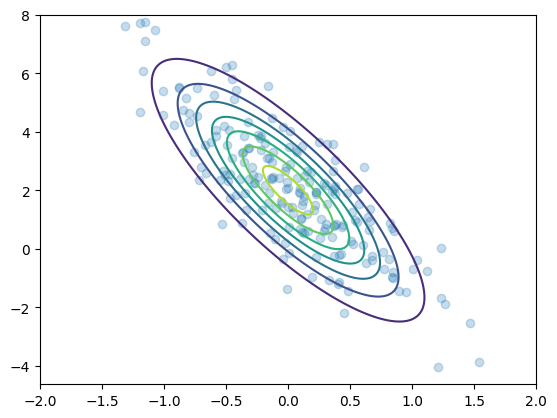

In [18]:
# create the x and y space for the plots to be possible
x = np.linspace(-2, 2, 200)
y = np.linspace(-4, 8, 200)
# creates the meshgrid to be plotted for the pdf
X, Y = np.meshgrid(x, y)    
# disply sampled and make them more transparent
plt.scatter(samples[:,0],samples[:,1], alpha=0.25)
# stack to create the pdf
pos = np.dstack((X,Y))
rv = multivariate_normal(mean, cov)
z = rv.pdf(pos)
# plot the contour
plt.contour(x,y,z)
plt.show()

## Problem 2 ##

In [19]:
np.random.seed(42)
# create the array
three_dim = np.array([[4, 2, 1], [2,3,1.5], [1, 1.5, 2]])
three_dim

array([[4. , 2. , 1. ],
       [2. , 3. , 1.5],
       [1. , 1.5, 2. ]])

In [20]:
mean2 = [0,0,0]
samples = np.random.multivariate_normal(mean2, three_dim, size=200) 

In [32]:
# i think this is right
U, S, V = np.linalg.svd(samples)
print(S)
print(U[:, :2])
pc = np.dot(S,V.T)
print("PC:",pc)
# PCs are determined by the 
proj_w = np.dot(U[:, :2], np.dot(U[:, :2].T, samples))
print(proj_w.shape)

[31.62441274 19.74862299 12.94825824]
[[-0.03859696 -0.01388945]
 [-0.12033246 -0.02078936]
 [-0.12609186  0.04953585]
 [-0.04274343 -0.03233483]
 [-0.01834801 -0.12715157]
 [ 0.04584734 -0.06961054]
 [ 0.07455064 -0.10060792]
 [ 0.01663636  0.01102114]
 [ 0.04199473  0.01411022]
 [-0.02925774 -0.04195266]
 [ 0.04547041  0.13093266]
 [ 0.08171966  0.06566829]
 [-0.01536226 -0.13179609]
 [-0.01625991  0.04995989]
 [ 0.00830261 -0.01478332]
 [ 0.05827374 -0.03355101]
 [-0.02491888 -0.12501562]
 [ 0.03169612 -0.04804814]
 [-0.08323042  0.064309  ]
 [ 0.02485111  0.02034233]
 [ 0.03720957 -0.00690826]
 [ 0.09473728  0.0554735 ]
 [ 0.00484975  0.06860231]
 [ 0.05182269  0.0214518 ]
 [-0.00102349  0.11903112]
 [-0.0653159   0.0042828 ]
 [-0.00518794 -0.13761597]
 [-0.03031377  0.10345512]
 [ 0.06521557 -0.03554372]
 [-0.02498361 -0.03998017]
 [-0.00932785  0.06969948]
 [ 0.02517891 -0.02041164]
 [-0.02370145  0.01706979]
 [ 0.01980706 -0.0959056 ]
 [ 0.02787099 -0.05391466]
 [-0.03393222  0.

In [22]:
corr = np.cov(pc.T, three_dim.T)
print("Correlation: \n", corr)
# 

Correlation: 
 [[ 4.09817790e+02  3.01994704e+01 -1.13420074e+00 -9.29555940e+00]
 [ 3.01994704e+01  2.33333333e+00  1.66666667e-01 -7.50000000e-01]
 [-1.13420074e+00  1.66666667e-01  5.83333333e-01 -1.25000000e-01]
 [-9.29555940e+00 -7.50000000e-01 -1.25000000e-01  2.50000000e-01]]


In [56]:
point = np.array([0, 0, 0])
normal = np.array([0, 0, 1])
d = -point.dot(normal)
xx, yy = np.meshgrid(U[:,0], U[:,1])
z = (-normal[0] * xx - normal[1] * yy - d) * 1. / normal[2]

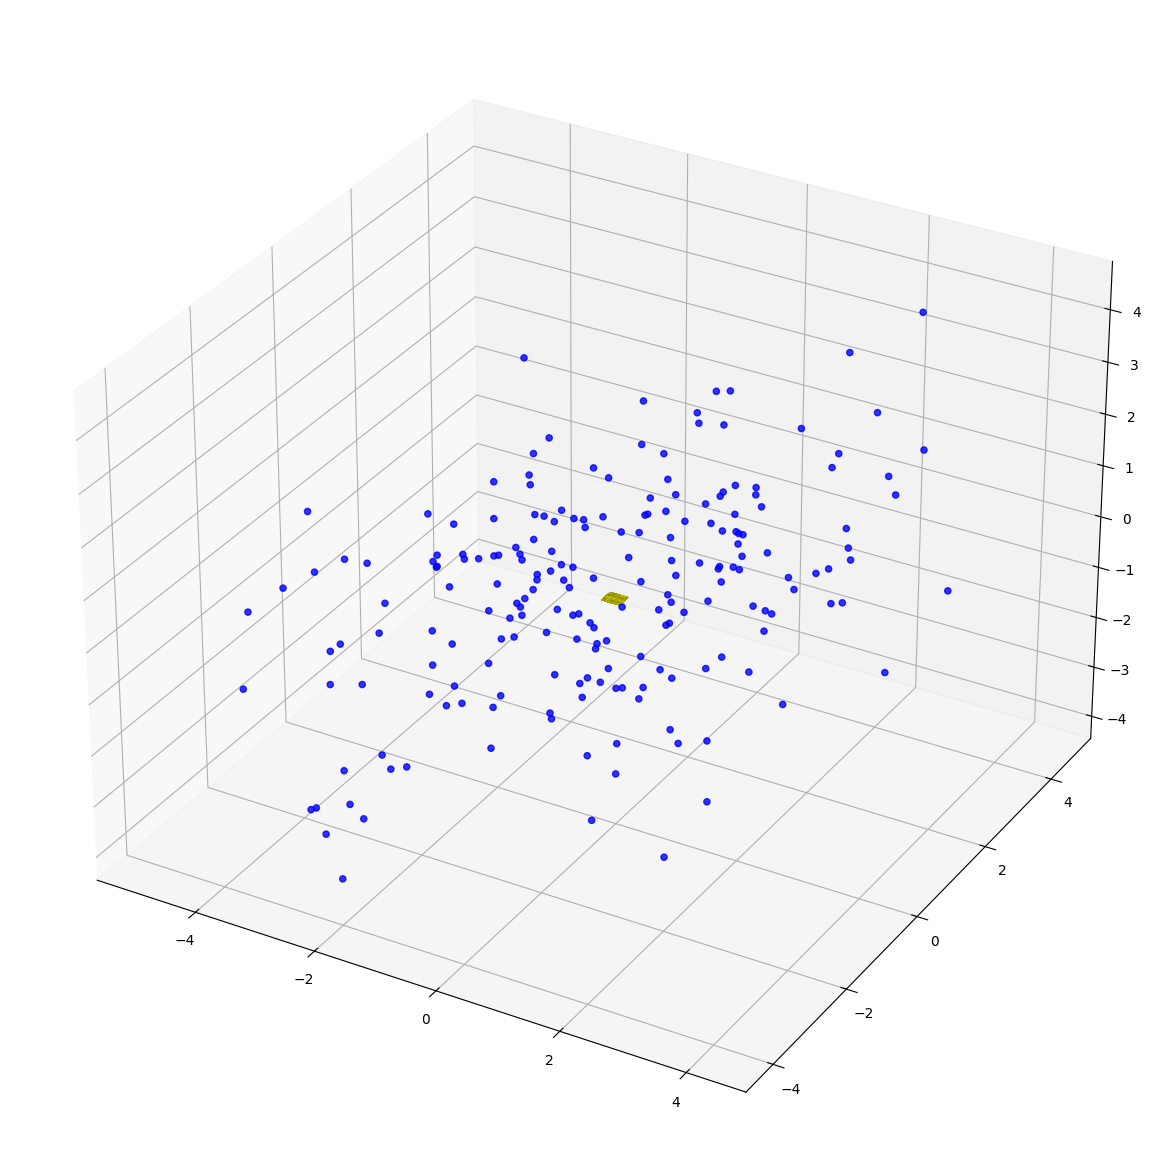

In [57]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(xx, yy,z, color="yellow", alpha=.8)
ax.scatter(samples[:,0], samples[:,1], samples[:,2], color="blue", alpha=.8)
plt.show()
# i think they agree with the correlation since all of them go to the same direction but I'm gonna be real no clue on what I am doing

In [58]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca.fit(samples)
X_pca = pca.transform(samples)

In [59]:
pca.components_

array([[ 0.68262505,  0.59843923,  0.41939663],
       [ 0.68888529, -0.33547005, -0.64257054],
       [ 0.24384441, -0.72755092,  0.64125624]])

(200, 3)


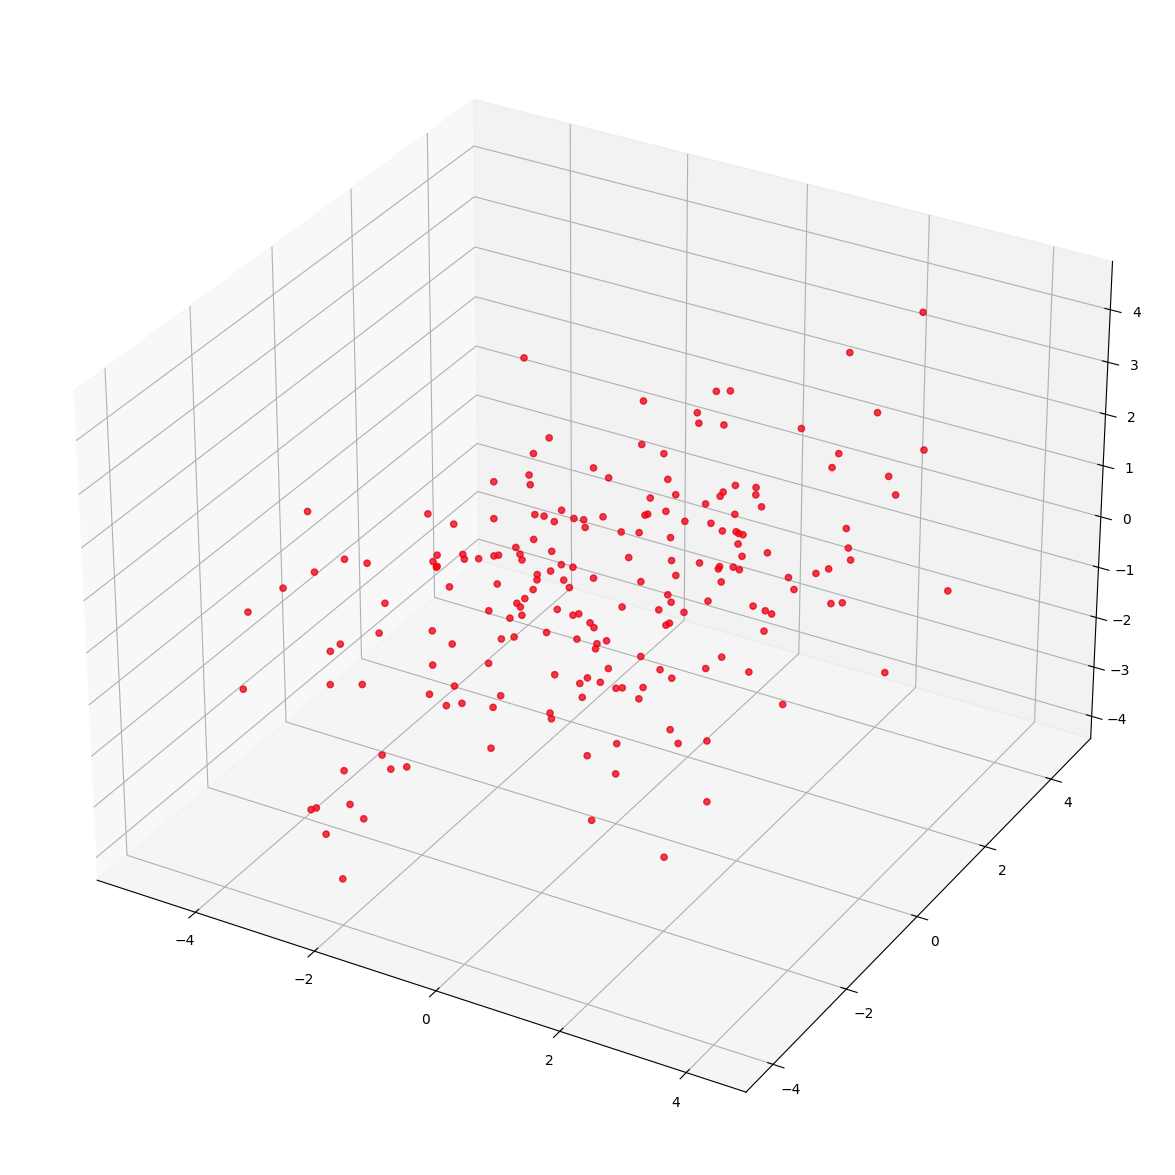

In [60]:
X_new = pca.inverse_transform(X_pca)
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111, projection='3d')
print(X_new.shape)
ax.scatter(samples[:, 0], samples[:, 1], samples[:,2], alpha=0.2, color="blue")
ax.scatter(X_new[:, 0], X_new[:, 1], X_new[:,2], alpha=0.7, color="red")
plt.show()
#considering the overlap i think it is 99% accaurte

In [80]:
# using pca method by prof
from sklearn.decomposition import PCA
np.random.seed(42)
X = np.random.multivariate_normal(mean2, three_dim, size=1000) 
pca = PCA(n_components=2)
pca.fit(samples)
X_pca = pca.transform(samples)
xx, yy = np.meshgrid(X_pca[:,0], X_pca[:,1])
z = (-normal[0] * xx - normal[1] * yy - d) * 1. / normal[2]
point = np.array([0, 0, 0])
normal = np.array([0, 0, 1])
# d = -point.dot(normal)
# xx, yy = np.meshgrid(U[:,0], U[:,1])
z = (-normal[0] * xx - normal[1] * yy - d) * 1. / normal[2]

In [88]:
import numpy as np
import matplotlib.pyplot as plt

sample_covariance_matrix = np.cov(samples, rowvar=False)

U, S, Vt = np.linalg.svd(sample_covariance_matrix)

projected_samples = np.dot(samples, U[:, :2])
print(projected_samples)
xx, yy = np.meshgrid(X_pca[:,0], X_pca[:,1])
z = (-projected_samples[:,0] * xx - projected_samples[:,1] * yy - d) * 1. / normal[2]

[[ 1.21715706 -0.28349994]
 [ 3.80119121 -0.45013824]
 [ 3.99759028  0.93622961]
 [ 1.34557373 -0.65469097]
 [ 0.55629347 -2.5263218 ]
 [-1.4639835  -1.35911136]
 [-2.37885791 -1.95672137]
 [-0.522606    0.21603613]
 [-1.32411053  0.28647276]
 [ 0.9170523  -0.83955887]
 [-1.41165836  2.60111869]
 [-2.56991345  1.31735278]
 [ 0.4605978  -2.61518347]
 [ 0.52401111  0.98268352]
 [-0.26419076 -0.29667461]
 [-1.85037543 -0.63911738]
 [ 0.76268808 -2.47616055]
 [-1.01244516 -0.93616335]
 [ 2.64551264  1.23990804]
 [-0.78263516  0.41457615]
 [-1.17703875 -0.13007384]
 [-2.98587919  1.13272738]
 [-0.13995628  1.35863314]
 [-1.63580477  0.44783304]
 [ 0.05849738  2.3384157 ]
 [ 2.06653512  0.0623706 ]
 [ 0.13671964 -2.72148712]
 [ 0.97973336  2.0316888 ]
 [-2.07016217 -0.67697319]
 [ 0.78157701 -0.79528137]
 [ 0.30952902  1.37058082]
 [-0.79899077 -0.40242729]
 [ 0.75289512  0.32971988]
 [-0.64514854 -1.89048792]
 [-0.89197583 -1.057072  ]
 [ 1.09864695  2.53819143]
 [ 0.69162177  0.01028123]
 

In [92]:
import numpy as np
import plotly.graph_objs as go
scatter = go.Scatter3d(
    x=samples[:, 0],
    y=samples[:, 1],
    z=samples[:, 2],
    mode='markers',
    marker=dict(
        size=2,
        color=samples[:, 2],
        colorscale='Viridis',
        opacity=0.7
    )
)
mean_sample = np.mean(samples, axis=0)
extended_samples = np.dot(projected_samples, U[:, :2].T) + mean_sample

axes = []
for i in range(2):
    axis = U[:, i] * max(S)
    axes.append(go.Scatter3d(
        x=[mean_sample[0], mean_sample[0] + axis[0]],
        y=[mean_sample[1], mean_sample[1] + axis[1]],
        z=[mean_sample[2], mean_sample[2] + axis[2]],
        mode='lines',
        line=dict(color='red', width=4)
    ))

corner_points = np.array([
    mean_sample + U[:, 0] * max(S) + U[:, 1] * max(S),
    mean_sample - U[:, 0] * max(S) + U[:, 1] * max(S),
    mean_sample - U[:, 0] * max(S) - U[:, 1] * max(S),
    mean_sample + U[:, 0] * max(S) - U[:, 1] * max(S)
])

layout = go.Layout(
    title='2D Projections in Original 3D Space',
    scene=dict(
        xaxis_title='X axis',
        yaxis_title='Y axis',
        zaxis_title='Z axis'
    )
)

plane = go.Mesh3d(
    x=corner_points[:, 0],
    y=corner_points[:, 1],
    z=corner_points[:, 2],
    opacity=0.5,
    color='yellow'
)

fig = go.Figure(data=[plane, scatter] + axes, layout=layout)
fig.update_layout(title='Data vs Plane')
print(min((samples[0:,0])))
fig.show()

-5.00330318967932
